In [498]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('seaborn')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from IPython import display


### Part (a)

In [2]:
dfFIFAdata_final_wtemp_pop_gdp =pd.read_csv(r"D:\Semester 7\Machine Learning\Assignment\dfFIFAdata_final_wtemp_pop_gdp.csv")
dfFIFAdata_final_wtemp_pop_gdp = dfFIFAdata_final_wtemp_pop_gdp.fillna(0)
dfFIFAdata_final_wtemp_pop_gdp.head()

,Year,team,away_goals_conceded,away_score,away_games,home_score,home_goals_conceded,home_games,hs_mean,as_mean,...,A_AttackS,H_DefenseS,A_DefenseS,WinCount,country,host_temp,team_temp,temp_diff,team_pop,team_gdp
0,1930,Argentina,4,2,1,16,5,4,2.277778,1.611111,...,1.241379,0.775862,1.756098,4,Uruguay,17.384833,14.843417,-2.541417,20481779.0,0.000000e+00
1,1930,Brazil,0,4,1,1,2,1,2.277778,1.611111,...,2.482759,1.241379,0.000000,1,Uruguay,17.384833,24.843833,7.459000,72179226.0,1.516557e+10
2,1930,Chile,3,1,1,4,0,2,2.277778,1.611111,...,0.620690,0.000000,1.317073,2,Uruguay,17.384833,9.646333,-7.738500,8132990.0,4.110000e+09
3,1930,France,2,0,2,4,1,1,2.277778,1.611111,...,0.000000,0.620690,0.439024,1,Uruguay,17.384833,13.168750,-4.216083,46621669.0,6.265147e+10
4,1930,Mexico,13,4,3,0,0,0,2.277778,1.611111,...,0.827586,0.000000,1.902439,0,Uruguay,17.384833,20.613583,3.228750,37771859.0,1.304000e+10


In [3]:
dfFIFAdata_final_wtemp_pop_gdp.columns

Index(['Year', 'team', 'away_goals_conceded', 'away_score', 'away_games',
       'home_score', 'home_goals_conceded', 'home_games', 'hs_mean', 'as_mean',
       'as_conceded_mean', 'hs_conceded_mean', 'H_AttackS', 'A_AttackS',
       'H_DefenseS', 'A_DefenseS', 'WinCount', 'country', 'host_temp',
       'team_temp', 'temp_diff', 'team_pop', 'team_gdp'],
      dtype='object')

Above dataset only consists of the games that have been played in the FIFA finals. Based on the goals each team has scored and conceded in each FIFA finals I have calculated the Attack strength, Defense strength of the teams when they are the home team and away team.
1. H_AttackS: Attack strength when the team is the home team
2. A_AttackS: Attack strength when the team is the away team
3. H_DefenseS: Defense strength when the team is the home team
4. A_DefenseS: Defense strength when the team is the away team
5. temp_diff: temperature difference between the host country and team based on the year
6. team_pop: population of the team based on the year
7. team_gdp: gdp of the team based on the year



- HomeAttackAStregth = Average Home Goals Scored by Team X/Average number of goals scored by the home teams
- HomeDefenseStregth = Average Home Goals Conceded by Team X/Average number of goals conceded by the home teams
- AwayAttackAStregth = Average Away Goals Scored by Team X/Average number of goals scored by the away teams
- AwayDefenseStregth = Average Away Goals Conceded by Team X/Average number of goals conceded by the away teams


If the temperature is alot different from the usual temperature team players are used to, then it will effect the performance of the team.

If the population is high in a particular country, there is more chance to get good players as there is a lot to choose from

If the gdp is high in a particular country, then the amount of money that can be spent on to develop and train players is also high.

In [4]:
# getting the power of the defense and attack stats
dfFIFAdata_final_wtemp_pop_gdp['H_DefenseS^2'] = dfFIFAdata_final_wtemp_pop_gdp['H_DefenseS'] ** 2
dfFIFAdata_final_wtemp_pop_gdp['A_DefenseS^2'] = dfFIFAdata_final_wtemp_pop_gdp['A_DefenseS'] ** 2
dfFIFAdata_final_wtemp_pop_gdp['A_AttackS^2'] = dfFIFAdata_final_wtemp_pop_gdp['A_AttackS'] ** 2
dfFIFAdata_final_wtemp_pop_gdp['H_AttackS^2'] = dfFIFAdata_final_wtemp_pop_gdp['H_AttackS'] ** 2

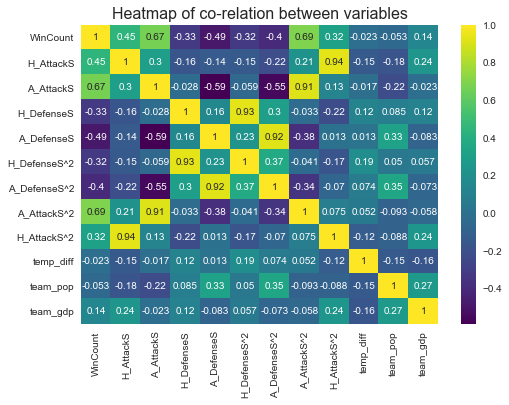

In [6]:
heatmapdata = dfFIFAdata_final_wtemp_pop_gdp[['WinCount','H_AttackS','A_AttackS','H_DefenseS','A_DefenseS','H_DefenseS^2','A_DefenseS^2','A_AttackS^2','H_AttackS^2','temp_diff','team_pop','team_gdp']]
sns.heatmap(heatmapdata.corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()

In the above graph high correlation is only visible between the variables which are squared and corresponnding variable which is in power of 1(ex: A_DefenseS and A_DefenseS^2). 

Multicollinearity is NOT a problem in this case. Multicollinearity has to be checked and problems have to be solved when you want to estimate the independent effect of two variables which happen to be correlated by chance. In here, we are not interested in evaluating the effect of changing A_DefenseS without changing A_DefenseS^2.
So there is no need to care about multicollinearity between one variable and a second variable which is a deterministic non linear function of the first one.

As other variables have correlations below 0.7 we can conclude that there is no multicolinearity present in the dataset

In [500]:
X = dfFIFAdata_final_wtemp_pop_gdp[['H_AttackS','A_AttackS','H_DefenseS','A_DefenseS','H_DefenseS^2','A_DefenseS^2','A_AttackS^2','H_AttackS^2','temp_diff','team_pop','team_gdp']]

y = dfFIFAdata_final_wtemp_pop_gdp['WinCount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [501]:
# Fitting the model
FIFA_model = LinearRegression()
FIFA_model.fit(X_train, y_train)

# Returning the R^2 for the model
FIFA_r2 = FIFA_model.score(X_test, y_test)

print('R^2: {0}'.format(FIFA_r2))

R^2: 0.8020434379024356


The accuracy of the model is 80.20%

### Part (b)

In [109]:
df2 = pd.read_csv(r"D:\Semester 7\Machine Learning\Assignment\AllmatcheswithStat_temp_pop_gdp_rankingEach.csv")
df2.head()

,home_team,away_team,home_goals,away_goals,Total_Score_home_team,Total_Score_away_team,HomeTeamRank_Difference,AwayTeamRank_Difference,Total_count_home_team,Total_count_away_team,...,AT_Hattack,HT_Aattack,AT_Aattack,HT_Hdefense,AT_Hdefense,HT_Adefense,AT_Adefense,TeamWon,Ranking_home_team,Ranking_away_team
0,Guyana,Barbados,0,2,4.0,7.0,14.0,-14.0,0,0,...,0.635667,1.006932,1.006932,2.013865,1.006932,0.635667,0.953501,-1,128.0,114.0
1,Egypt,Norway,0,0,45.0,49.0,7.0,-7.0,0,0,...,2.034136,1.342577,1.174754,0.575390,0.604159,0.741612,0.529723,0,21.0,14.0
2,Cameroon,Morocco,1,0,43.0,32.0,-19.0,19.0,0,0,...,1.430252,0.881066,0.755199,0.575390,0.503466,0.556209,0.635667,1,22.0,41.0
3,Senegal,Nigeria,1,2,27.0,50.0,38.0,-38.0,0,0,...,1.271335,1.510399,1.510399,0.604159,0.604159,0.953501,0.476751,-1,51.0,13.0
4,Egypt,Zambia,0,1,45.0,38.0,-11.0,11.0,0,0,...,2.118891,1.342577,1.510399,0.575390,0.335644,0.741612,0.444967,-1,21.0,32.0


The above dataset has all the matches played since 1992. 

In [110]:
df2.columns

Index(['home_team', 'away_team', 'home_goals', 'away_goals',
       'Total_Score_home_team', 'Total_Score_away_team',
       'HomeTeamRank_Difference', 'AwayTeamRank_Difference',
       'Total_count_home_team', 'Total_count_away_team', 'Country', 'Year',
       'tournament', 'host_temp', 'home_temp', 'away_temp', 'homeTemp_diff',
       'awayTemp_diff', 'home_pop', 'away_pop', 'Hteam_gdp', 'Ateam_gdp',
       'HT_Hattack', 'AT_Hattack', 'HT_Aattack', 'AT_Aattack', 'HT_Hdefense',
       'AT_Hdefense', 'HT_Adefense', 'AT_Adefense', 'TeamWon',
       'Ranking_home_team', 'Ranking_away_team'],
      dtype='object')

- GDP, Population adn Temperature is based on the year and country. 
- Total score is the total points gained by that each team for that particular year
- Total count is the number of games played by each team (home and away) based on the year

In [113]:
# get the result of the game
# if home wins -> 1, if away_wins -> -1, if draw -> 0
def teamWon(df):
    if(df['home_goals']>df['away_goals']):
        return 1
    elif(df['home_goals']<df['away_goals']):
        return -1
    elif(df['home_goals']==df['away_goals']):
        return 0
    
df2["TeamWon"] = df2.apply(teamWon,axis = 1)

In [382]:
# get whether the event was held in a natural place or not
# natural = 0, not natural = 1
def neutral(df):
    if(df['home_team']==['Country']):
        return 0
    elif(df['away_team']==df['Country']):
        return 0
    else:
        return 1
df2["Neutral"] = df2.apply(neutral,axis = 1)

In [114]:
# get the squared terms of the below variables
df2['HT_Hattack^2'] = df2['HT_Hattack']**2
df2['AT_Aattack^2'] = df2['AT_Aattack']**2
df2['HT_Hdefense^2'] = df2['HT_Hdefense']**2
df2['AT_Adefense^2'] = df2['AT_Adefense']**2

In [115]:
df2.describe()

,home_goals,away_goals,Total_Score_home_team,Total_Score_away_team,HomeTeamRank_Difference,AwayTeamRank_Difference,Total_count_home_team,Total_count_away_team,Year,host_temp,...,AT_Hdefense,HT_Adefense,AT_Adefense,TeamWon,Ranking_home_team,Ranking_away_team,HT_Hattack^2,AT_Aattack^2,HT_Hdefense^2,AT_Adefense^2
count,18318.000000,18318.000000,18318.000000,18318.000000,18318.000000,18318.000000,18318.000000,18318.000000,18318.00000,18318.000000,...,18318.000000,18318.000000,18318.000000,18318.000000,18318.000000,18318.000000,18318.000000,18318.000000,18318.000000,18318.000000
mean,1.562834,1.028497,420.833718,410.121861,-3.134353,3.134353,5.584125,5.115351,2005.45731,17.984082,...,0.923054,0.896415,0.931424,0.213615,66.497652,69.632006,1.191355,1.274633,1.214495,1.181142
std,1.555144,1.192576,348.945764,340.440746,53.141023,53.141023,3.553458,2.962388,7.50866,8.444782,...,0.716922,0.554565,0.560007,0.838720,48.710860,50.040096,1.348758,1.624771,2.917013,2.480733
min,0.000000,0.000000,0.000000,0.000000,-203.500000,-200.818182,0.000000,0.000000,1992.00000,-19.000417,...,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,58.000000,57.000000,-35.000000,-27.500000,3.000000,3.000000,1999.00000,10.707167,...,0.504384,0.558519,0.603789,-1.000000,24.753788,26.833333,0.454434,0.370682,0.318603,0.364561
50%,1.000000,1.000000,401.833333,396.500000,-3.591667,3.591667,5.000000,5.000000,2006.00000,20.045250,...,0.831015,0.801504,0.830210,0.000000,60.583333,63.400000,0.891424,0.834035,0.683024,0.689249
75%,2.000000,2.000000,625.607955,609.250000,27.500000,35.000000,7.000000,7.000000,2012.00000,25.518583,...,1.167826,1.118357,1.121323,1.000000,100.666667,104.500000,1.550191,1.660510,1.312008,1.257365
max,31.000000,17.000000,1752.636364,1752.636364,200.818182,203.500000,23.000000,18.000000,2018.00000,30.744750,...,16.438596,11.688935,11.688935,1.000000,207.000000,207.000000,79.857622,63.309627,225.882496,136.631208


The deviations in the means between each variables are very high. Therefore, the data should be normalized

In [450]:
Y = df2.TeamWon
X = df2[['home_goals','away_goals', 'Total_Score_home_team', 'Total_Score_away_team',
       'HomeTeamRank_Difference', 'AwayTeamRank_Difference',
       'Total_count_home_team', 'Total_count_away_team',
       'host_temp', 'home_temp', 'away_temp', 'homeTemp_diff',
       'awayTemp_diff', 'home_pop', 'away_pop', 'Hteam_gdp', 'Ateam_gdp',
       'HT_Hattack', 'AT_Hattack', 'HT_Aattack', 'AT_Aattack', 'HT_Hdefense',
       'AT_Hdefense', 'HT_Adefense', 'AT_Adefense',
       'Ranking_home_team', 'Ranking_away_team','HT_Hattack^2','AT_Aattack^2','AT_Adefense^2','HT_Hdefense^2']]

columns = X.columns
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std = pd.DataFrame(X_std, columns = columns)
df2.Neutral.reset_index(drop=True, inplace=True)
X_std.reset_index(drop=True, inplace=True)
X_std = pd.concat([X_std,df2.Neutral], axis = 1)

X_std.head()

,home_goals,away_goals,Total_Score_home_team,Total_Score_away_team,HomeTeamRank_Difference,AwayTeamRank_Difference,Total_count_home_team,Total_count_away_team,host_temp,home_temp,...,AT_Hdefense,HT_Adefense,AT_Adefense,Ranking_home_team,Ranking_away_team,HT_Hattack^2,AT_Aattack^2,AT_Adefense^2,HT_Hdefense^2,Neutral
0,-1.004972,0.814648,-1.194584,-1.184150,0.322441,-0.322441,-1.571505,-1.726813,1.008875,0.949042,...,0.117002,-0.470198,0.039423,1.262635,0.886673,-0.808422,-0.160470,-0.109639,0.974021,1
1,-1.004972,-0.862439,-1.077084,-1.060777,0.190712,-0.190712,-1.571505,-1.726813,0.541276,0.483376,...,-0.444822,-0.279152,-0.717335,-0.934061,-1.111779,-0.730466,0.064882,-0.363022,-0.302860,1
2,-0.361928,-0.862439,-1.082816,-1.110714,-0.298566,0.298566,-1.571505,-1.726813,1.240534,0.688859,...,-0.585278,-0.613482,-0.528145,-0.913531,-0.572197,-0.271899,-0.433492,-0.313250,-0.302860,1
3,-0.361928,0.814648,-1.128670,-1.057840,0.774081,-0.774081,-1.571505,-1.726813,1.240534,1.179742,...,-0.444822,0.102941,-0.811930,-0.318165,-1.131763,0.087373,0.619594,-0.384514,-0.291226,1
4,-1.004972,-0.023896,-1.077084,-1.093089,-0.148019,0.148019,-1.571505,-1.726813,1.240534,0.483376,...,-0.819371,-0.279152,-0.868687,-0.934061,-0.752058,-0.730466,0.619594,-0.396323,-0.302860,1


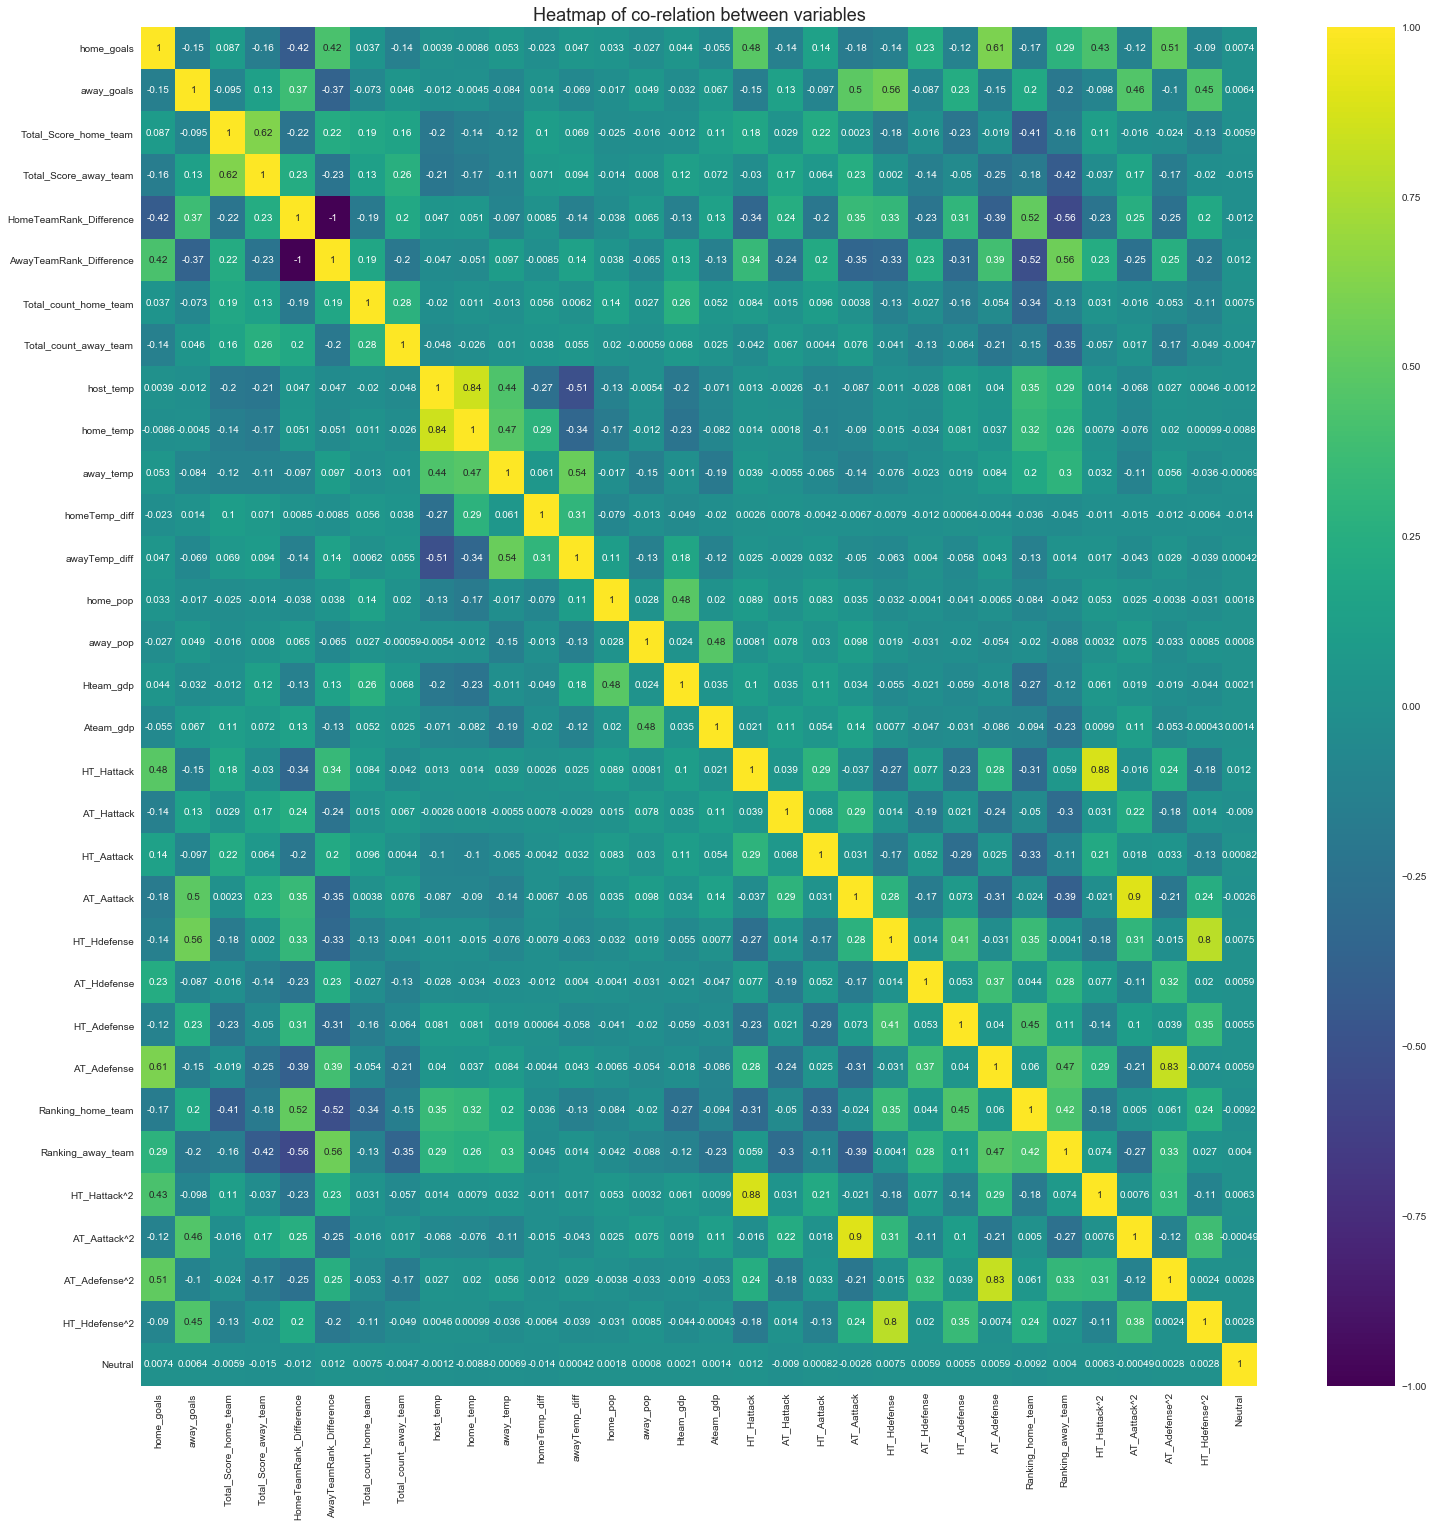

In [386]:
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(X_std.corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=18)
plt.show()

host_temp is highly correlated with home_temp. Therefore host_temp is dropped from the dataset.
Other highly correlated terms are the variables which has been squared. Hence, we can ignore that high colinearity (reason is mensioned above). All other variables have correlations below 0.7
As other variables have correlations below 0.7 we can conclude that there is no multicolinearity present in the dataset
After trying several models, below is the model I came up with.

In [451]:
X = X_std[['HomeTeamRank_Difference', 'Total_Score_home_team', 'Total_Score_away_team','home_temp', 'away_temp',
         'home_pop', 'away_pop', 'Hteam_gdp', 'Ateam_gdp','HT_Hattack', 'AT_Hattack', 'HT_Aattack', 'AT_Aattack', 'HT_Hdefense',
       'AT_Hdefense', 'HT_Adefense', 'AT_Adefense','HT_Hattack^2','AT_Aattack^2','AT_Adefense^2','HT_Hdefense^2','Neutral']]

y = df2['TeamWon']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lm = LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(X_train, y_train)

lm.score(X_test, y_test)

0.6426799007444168

The accuracy I got for this model is 64.26%

In [452]:
# classes of the model
lm.classes_

array([-1,  0,  1], dtype=int64)

In [453]:
# predictions based on the test dataset
predictions = lm.predict(X_test)

In [454]:
print(metrics.classification_report(y_test, predictions) )

              precision    recall  f1-score   support

          -1       0.63      0.68      0.65      1630
           0       0.47      0.15      0.22      1494
           1       0.67      0.88      0.76      2921

    accuracy                           0.64      6045
   macro avg       0.59      0.57      0.54      6045
weighted avg       0.61      0.64      0.60      6045



##### Predicting

In [457]:
statAll = pd.read_csv(r"C:\Users\Suwani Gunasekara\OneDrive\Documents\Sem 7 ML\Mid term\data_statistics_yearly.csv")
statAll.tail()

,Year,team,away_goals_conceded,away_score,away_games,home_score,home_goals_conceded,home_games,hs_mean,as_mean,as_conceded_mean,hs_conceded_mean,H_AttackS,A_AttackS,H_DefenseS,A_DefenseS
11010,2021,United States,1,2,1,11.0,1.0,2.0,1.617347,1.193878,1.617347,1.193878,3.400631,1.675214,0.418803,0.618297
11011,2021,Uzbekistan,0,2,1,0.0,1.0,1.0,1.617347,1.193878,1.617347,1.193878,0.000000,1.675214,0.837607,0.000000
11012,2021,Wales,3,1,1,2.0,0.0,2.0,1.617347,1.193878,1.617347,1.193878,0.618297,0.837607,0.000000,1.854890
11013,2021,Zambia,0,2,1,3.0,3.0,1.0,1.617347,1.193878,1.617347,1.193878,1.854890,1.675214,2.512821,0.000000
11014,2021,Zimbabwe,0,1,1,0.0,2.0,1.0,1.617347,1.193878,1.617347,1.193878,0.000000,0.837607,1.675214,0.000000


In [459]:
#statistic of each country
EnglandStat = statAll.loc[(statAll.team == 'England') & (statAll.Year == 2021)]
BrazildStat = statAll.loc[(statAll.team == 'Brazil') & (statAll.Year == 2020)]
UruguayStat = statAll.loc[(statAll.team == 'Uruguay') & (statAll.Year == 2020)]
FranceStat = statAll.loc[(statAll.team == 'France') & (statAll.Year == 2021)]
GermanyStat = statAll.loc[(statAll.team == 'Germany') & (statAll.Year == 2021)]


In [460]:
# population statistic taken from internet as per 2021
popEn = 56223000
popBrazil =214256441
popUrugua = 3487194
popFrance = 65435866
popGermany = 83020000 

In [461]:
# gdp statistic taken from internet as per 2021 
gdpEn = 3124650000000
gdpBrazil = 1444730000000
gdpUrugua = 5670000000
gdpFrance = 2938270000000
gdpGermany = 4319290000000

In [462]:
# average temperaturs taken from the internet as per 2021
temppEn = 6.4
tempBrazil = 22
tempUrugua = 14
tempFrance = 13.08
tempGermany = 8

In [463]:
predictData = pd.concat([EnglandStat, BrazildStat,UruguayStat,FranceStat,GermanyStat]).reset_index()
predictData.head()

,index,Year,team,away_goals_conceded,away_score,away_games,home_score,home_goals_conceded,home_games,hs_mean,as_mean,as_conceded_mean,hs_conceded_mean,H_AttackS,A_AttackS,H_DefenseS,A_DefenseS
0,10909,2021,England,0,2,1,7.0,1.0,2.0,1.617347,1.193878,1.617347,1.193878,2.164038,1.675214,0.418803,0.000000
1,10773,2020,Brazil,2,6,2,6.0,0.0,2.0,1.447552,1.038462,1.447552,1.038462,2.072464,2.888889,0.000000,0.690821
2,10859,2020,Uruguay,4,5,2,2.0,3.0,2.0,1.447552,1.038462,1.447552,1.038462,0.690821,2.407407,1.444444,1.381643
3,10916,2021,France,0,3,2,1.0,1.0,1.0,1.617347,1.193878,1.617347,1.193878,0.618297,1.256410,0.837607,0.000000
4,10920,2021,Germany,0,1,1,4.0,2.0,2.0,1.617347,1.193878,1.617347,1.193878,1.236593,0.837607,0.837607,0.000000


In [464]:
# make a df using the population,gdp and temperature statistics
df_ = pd.DataFrame([['England',popEn,gdpEn,temppEn,0],['Brazil',popBrazil,gdpBrazil,tempBrazil,0],
             ['Uruguay',popUrugua,gdpUrugua,tempUrugua,0],['France',popFrance,gdpFrance,tempFrance,0],['Germany',popGermany,gdpGermany,tempGermany,0]],
            columns = ['team','Population','GDP','temp','Neutral'])
df_

,team,Population,GDP,temp,Neutral
0,England,56223000,3124650000000,6.40,0
1,Brazil,214256441,1444730000000,22.00,0
2,Uruguay,3487194,5670000000,14.00,0
3,France,65435866,2938270000000,13.08,0
4,Germany,83020000,4319290000000,8.00,0


In [465]:
predictData = pd.merge(predictData, df_, on='team')
predictData.head()

,index,Year,team,away_goals_conceded,away_score,away_games,home_score,home_goals_conceded,home_games,hs_mean,...,as_conceded_mean,hs_conceded_mean,H_AttackS,A_AttackS,H_DefenseS,A_DefenseS,Population,GDP,temp,Neutral
0,10909,2021,England,0,2,1,7.0,1.0,2.0,1.617347,...,1.617347,1.193878,2.164038,1.675214,0.418803,0.000000,56223000,3124650000000,6.40,0
1,10773,2020,Brazil,2,6,2,6.0,0.0,2.0,1.447552,...,1.447552,1.038462,2.072464,2.888889,0.000000,0.690821,214256441,1444730000000,22.00,0
2,10859,2020,Uruguay,4,5,2,2.0,3.0,2.0,1.447552,...,1.447552,1.038462,0.690821,2.407407,1.444444,1.381643,3487194,5670000000,14.00,0
3,10916,2021,France,0,3,2,1.0,1.0,1.0,1.617347,...,1.617347,1.193878,0.618297,1.256410,0.837607,0.000000,65435866,2938270000000,13.08,0
4,10920,2021,Germany,0,1,1,4.0,2.0,2.0,1.617347,...,1.617347,1.193878,1.236593,0.837607,0.837607,0.000000,83020000,4319290000000,8.00,0


In [467]:
# importing the dataset which has ranks
rank = pd.read_csv(r"C:\Users\Suwani Gunasekara\OneDrive\Documents\Sem 7 ML\Mid term\fifa_ranking-2021-05-27.csv")
rank['rYear'] = rank['rank_date'].apply(lambda x: int(str.split(x,'-')[0]))
rank = rank.drop(columns = ['id','rank_date','confederation','rank_change','previous_points','country_abrv'])
rank = rank.rename(columns = {'country_full':'team','total_points':'total_score','rYear':'Year'})
rank.tail()

,rank,team,total_score,Year
63049,137,Tanzania,1088,2021
63050,136,Suriname,1089,2021
63051,135,St. Kitts and Nevis,1091,2021
63052,159,Singapore,1020,2021
63053,2,France,1757,2021


In [468]:
# take the average rank based on year as the rank dataset has monthly ranks
cr = rank.groupby(['team','Year']).mean().reset_index()
cr.head()

,team,Year,rank,total_score
0,Afghanistan,2003,199.000000,42.833333
1,Afghanistan,2004,197.500000,62.750000
2,Afghanistan,2005,198.833333,57.750000
3,Afghanistan,2006,181.454545,67.363636
4,Afghanistan,2007,186.250000,24.333333


In [469]:
# getting relevant ranks for each team
rEngland = cr.loc[(cr.team == 'England')&(cr.Year == 2021)]
rBrazil = cr.loc[(cr.team == 'Brazil')&(cr.Year == 2021)]
rUruguay = cr.loc[(cr.team == 'Uruguay')&(cr.Year == 2021)]
rFrance = cr.loc[(cr.team == 'France')&(cr.Year == 2021)]
rGermany = cr.loc[(cr.team == 'Germany')&(cr.Year == 2021)]

In [470]:
# creating a dataset with ranks and total scores for each team
rankpredict = pd.concat([rEngland, rBrazil,rUruguay,rFrance,rGermany]).reset_index()

In [471]:
rankpredict.head()

,index,team,Year,rank,total_score
0,1779,England,2021,4.000000,1680.666667
1,789,Brazil,2021,3.000000,1742.333333
2,5782,Uruguay,2021,8.666667,1639.000000
3,2011,France,2021,2.000000,1756.333333
4,2129,Germany,2021,12.333333,1609.333333


In [472]:
predictData = pd.merge(predictData,rankpredict, on ='team')
predictData.head()

,index_x,Year_x,team,away_goals_conceded,away_score,away_games,home_score,home_goals_conceded,home_games,hs_mean,...,H_DefenseS,A_DefenseS,Population,GDP,temp,Neutral,index_y,Year_y,rank,total_score
0,10909,2021,England,0,2,1,7.0,1.0,2.0,1.617347,...,0.418803,0.000000,56223000,3124650000000,6.40,0,1779,2021,4.000000,1680.666667
1,10773,2020,Brazil,2,6,2,6.0,0.0,2.0,1.447552,...,0.000000,0.690821,214256441,1444730000000,22.00,0,789,2021,3.000000,1742.333333
2,10859,2020,Uruguay,4,5,2,2.0,3.0,2.0,1.447552,...,1.444444,1.381643,3487194,5670000000,14.00,0,5782,2021,8.666667,1639.000000
3,10916,2021,France,0,3,2,1.0,1.0,1.0,1.617347,...,0.837607,0.000000,65435866,2938270000000,13.08,0,2011,2021,2.000000,1756.333333
4,10920,2021,Germany,0,1,1,4.0,2.0,2.0,1.617347,...,0.837607,0.000000,83020000,4319290000000,8.00,0,2129,2021,12.333333,1609.333333


In [473]:
# Qatar average temperature 
predictData['host_country_temp'] = 23.6

In [474]:
predictData['H_AttackS^2'] = predictData['H_AttackS']**2
predictData['A_AttackS^2'] = predictData['A_AttackS']**2
predictData['H_DefenseS^2'] = predictData['H_DefenseS']**2
predictData['A_DefenseS^2'] = predictData['A_DefenseS']**2

In [476]:
predictData.columns

Index(['index_x', 'Year_x', 'team', 'away_goals_conceded', 'away_score',
       'away_games', 'home_score', 'home_goals_conceded', 'home_games',
       'hs_mean', 'as_mean', 'as_conceded_mean', 'hs_conceded_mean',
       'H_AttackS', 'A_AttackS', 'H_DefenseS', 'A_DefenseS', 'Population',
       'GDP', 'temp', 'Neutral', 'index_y', 'Year_y', 'rank', 'total_score',
       'host_country_temp', 'H_AttackS^2', 'A_AttackS^2', 'H_DefenseS^2',
       'A_DefenseS^2'],
      dtype='object')

In [477]:
def makedataset(hteam,ateam,neutral):
    
    '''
    This function returns a dataframe which has data to predict the probability winning for each team.
    It takes the arguments 
    hteam = home_team
    ateam = away_team
    neutral = whether the event was held in a neutral place.
    if neutral = 0, then there is no difference between the home and away team. 
    '''
    
    HomeTeamRank = predictData.loc[(predictData.team == hteam),'rank'].item()
    #print(HomeTeamRank)
    AwayTeamRank = predictData.loc[(predictData.team == ateam),'rank'].item()
    #print(AwayTeamRank)
    Total_Score_home_team = predictData.loc[(predictData.team == hteam),'total_score'].item()
    Total_Score_away_team = predictData.loc[(predictData.team == ateam),'total_score'].item()
    home_temp =  predictData.loc[(predictData.team == hteam),'temp'].item()
    away_temp =  predictData.loc[(predictData.team == ateam),'temp'].item()
    home_pop = predictData.loc[(predictData.team == hteam),'Population'].item()
    away_pop = predictData.loc[(predictData.team == ateam),'Population'].item()
    Hteam_gdp = predictData.loc[(predictData.team == hteam),'GDP'].item()
    Ateam_gdp = predictData.loc[(predictData.team == ateam),'GDP'].item()
    HT_Hattack = predictData.loc[(predictData.team == hteam),'H_AttackS'].item()
    AT_Hattack = predictData.loc[(predictData.team == ateam),'H_AttackS'].item()
    HT_Aattack = predictData.loc[(predictData.team == hteam),'A_AttackS'].item()
    AT_Aattack = predictData.loc[(predictData.team == ateam),'A_AttackS'].item()
    HT_Hdefense = predictData.loc[(predictData.team == hteam),'H_DefenseS'].item()
    AT_Hdefense = predictData.loc[(predictData.team == ateam),'H_DefenseS'].item()
    HT_Adefense = predictData.loc[(predictData.team == hteam),'A_DefenseS'].item()
    AT_Adefense = predictData.loc[(predictData.team == ateam),'A_DefenseS'].item()
    HomeTeamRank_Difference = HomeTeamRank-AwayTeamRank
    HT_Hattack_2 = HT_Hattack**2
    AT_Aattack_2 = AT_Aattack**2
    AT_Adefense_2 = AT_Adefense**2
    HT_Hdefense_2 = HT_Hdefense**2
    #Neutral = 0
    
    k = pd.DataFrame([[hteam,ateam,HomeTeamRank_Difference, Total_Score_home_team, Total_Score_away_team,home_temp, away_temp,
         home_pop, away_pop, Hteam_gdp, Ateam_gdp,HT_Hattack, AT_Hattack, HT_Aattack, AT_Aattack, HT_Hdefense,
       AT_Hdefense, HT_Adefense, AT_Adefense,HT_Hattack_2,AT_Aattack_2,AT_Adefense_2,HT_Hdefense_2,neutral]],
                columns = ['hteam','ateam','HomeTeamRank_Difference', 'Total_Score_home_team', 'Total_Score_away_team','home_temp', 'away_temp',
         'home_pop', 'away_pop', 'Hteam_gdp', 'Ateam_gdp','HT_Hattack', 'AT_Hattack', 'HT_Aattack', 'AT_Aattack', 'HT_Hdefense',
       'AT_Hdefense', 'HT_Adefense', 'AT_Adefense','HT_Hattack^2','AT_Aattack^2','AT_Adefense^2','HT_Hdefense^2','Neutral'])
    return k

In [488]:
EB = makedataset('England','Brazil',1)
EU = makedataset('England','Uruguay',1)
EF = makedataset('England','France',1)
EG = makedataset('England','Germany',1)

In [489]:
# making a dataset outof the above 4 dataframes
predictdata = pd.concat([EB, EU,EF,EG]).reset_index()
predictdata.head()

,index,hteam,ateam,HomeTeamRank_Difference,Total_Score_home_team,Total_Score_away_team,home_temp,away_temp,home_pop,away_pop,...,AT_Aattack,HT_Hdefense,AT_Hdefense,HT_Adefense,AT_Adefense,HT_Hattack^2,AT_Aattack^2,AT_Adefense^2,HT_Hdefense^2,Neutral
0,0,England,Brazil,1.000000,1680.666667,1742.333333,6.4,22.00,56223000,214256441,...,2.888889,0.418803,0.000000,0.0,0.690821,4.68306,8.345679,0.477234,0.175396,1
1,0,England,Uruguay,-4.666667,1680.666667,1639.000000,6.4,14.00,56223000,3487194,...,2.407407,0.418803,1.444444,0.0,1.381643,4.68306,5.795610,1.908936,0.175396,1
2,0,England,France,2.000000,1680.666667,1756.333333,6.4,13.08,56223000,65435866,...,1.256410,0.418803,0.837607,0.0,0.000000,4.68306,1.578567,0.000000,0.175396,1
3,0,England,Germany,-8.333333,1680.666667,1609.333333,6.4,8.00,56223000,83020000,...,0.837607,0.418803,0.837607,0.0,0.000000,4.68306,0.701585,0.000000,0.175396,1


In [490]:
X = predictdata[['HomeTeamRank_Difference', 'Total_Score_home_team', 'Total_Score_away_team','home_temp', 'away_temp',
         'home_pop', 'away_pop', 'Hteam_gdp', 'Ateam_gdp','HT_Hattack', 'AT_Hattack', 'HT_Aattack', 'AT_Aattack', 'HT_Hdefense',
       'AT_Hdefense', 'HT_Adefense', 'AT_Adefense','HT_Hattack^2','AT_Aattack^2','AT_Adefense^2','HT_Hdefense^2']]
columns = X.columns
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std = pd.DataFrame(X_std, columns = columns)
    

predictdata.Neutral.reset_index(drop=True, inplace=True)
X_std.reset_index(drop=True, inplace=True)
X_std = pd.concat([X_std,predictdata.Neutral], axis = 1)
    
    
    
predictions = lm.predict(X_std)
probability = lm.predict_proba(X_std)

In [491]:
# probability that each game will result in away_win, draw, home_win
probability

array([[0.35886526, 0.2710751 , 0.37005964],
       [0.11609276, 0.07630375, 0.80760348],
       [0.36003012, 0.39414021, 0.24582967],
       [0.08150443, 0.30367399, 0.61482158]])

In [483]:
lm.classes_

array([-1,  0,  1], dtype=int64)

According to the above probilities,
- the chances of England winning the game is 0.37 and the chances of Brazil winning the game is 0.35. Therefore England will win the game

- the chances of England winning the game is 0.80 and the chances of Uruguay winning the game is 0.11. Therefore England will win the game

- the chances of England winning the game is 0.24 and the chances of France winning the game is 0.36. The highest probability is to draw. Therefore the match will most likely be a draw.

- the chances of England winning the game is 0.61 and the chances of Germany winning the game is 0.08. Therefore England will win the game



### Part (C)

If the tournament is held in England, then the place is not neutral. Therefore, Neutral = 0.

In [492]:
EB_ = makedataset('England','Brazil',0)
EU_ = makedataset('England','Uruguay',0)
EF_ = makedataset('England','France',0)
EG_ = makedataset('England','Germany',0)
predictdata_ = pd.concat([EB_, EU_,EF_,EG_]).reset_index()
predictdata_.head()

,index,hteam,ateam,HomeTeamRank_Difference,Total_Score_home_team,Total_Score_away_team,home_temp,away_temp,home_pop,away_pop,...,AT_Aattack,HT_Hdefense,AT_Hdefense,HT_Adefense,AT_Adefense,HT_Hattack^2,AT_Aattack^2,AT_Adefense^2,HT_Hdefense^2,Neutral
0,0,England,Brazil,1.000000,1680.666667,1742.333333,6.4,22.00,56223000,214256441,...,2.888889,0.418803,0.000000,0.0,0.690821,4.68306,8.345679,0.477234,0.175396,0
1,0,England,Uruguay,-4.666667,1680.666667,1639.000000,6.4,14.00,56223000,3487194,...,2.407407,0.418803,1.444444,0.0,1.381643,4.68306,5.795610,1.908936,0.175396,0
2,0,England,France,2.000000,1680.666667,1756.333333,6.4,13.08,56223000,65435866,...,1.256410,0.418803,0.837607,0.0,0.000000,4.68306,1.578567,0.000000,0.175396,0
3,0,England,Germany,-8.333333,1680.666667,1609.333333,6.4,8.00,56223000,83020000,...,0.837607,0.418803,0.837607,0.0,0.000000,4.68306,0.701585,0.000000,0.175396,0


In [493]:
X = predictdata_[['HomeTeamRank_Difference', 'Total_Score_home_team', 'Total_Score_away_team','home_temp', 'away_temp',
         'home_pop', 'away_pop', 'Hteam_gdp', 'Ateam_gdp','HT_Hattack', 'AT_Hattack', 'HT_Aattack', 'AT_Aattack', 'HT_Hdefense',
       'AT_Hdefense', 'HT_Adefense', 'AT_Adefense','HT_Hattack^2','AT_Aattack^2','AT_Adefense^2','HT_Hdefense^2']]
columns = X.columns
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std = pd.DataFrame(X_std, columns = columns)
    

predictdata_.Neutral.reset_index(drop=True, inplace=True)
X_std.reset_index(drop=True, inplace=True)
X_std = pd.concat([X_std,predictdata_.Neutral], axis = 1)
    
    
    
predictions = lm.predict(X_std)
probability = lm.predict_proba(X_std)

In [494]:
probability

array([[0.35469895, 0.35844443, 0.28685661],
       [0.14528985, 0.13887782, 0.71583233],
       [0.35072501, 0.45865355, 0.19062144],
       [0.09538767, 0.39818439, 0.50642794]])

According to the above probilities,
- the chances of England winning the game is 0.28 and the chances of Brazil winning the game is 0.35. Therefore Brazil will win the game

- the chances of England winning the game is 0.71 and the chances of Uruguay winning the game is 0.14. Therefore England will win the game

- the chances of England winning the game is 0.19 and the chances of France winning the game is 0.35. There is a higher chance for the match to be a draw with a probability of 0.45

- the chances of England winning the game is 0.50 and the chances of Germany winning the game is 0.09. Therefore England will win the game

